In [1]:
import numpy as np
from skimage import data, io, segmentation, color, data

from skimage.future import graph
import os
import matplotlib.pyplot as plt

In [2]:
#This sorts a given list into alphanumeric order
import re
def sorted_nicely(l):
    """ Sorts the given iterable in the way that is expected.
    Required arguments:
    l -- The iterable to be sorted.
    """
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)

In [3]:
#This block will get the classification folder names and sort them into alphanumeric so it can be used later on for making classes.
current_directory = os.getcwd()
#print(current_directory)
classification_file_directory = current_directory + "/Classification_files"
classification_files_names = os.listdir(classification_file_directory)

for i in classification_files_names:
    if "." in i:
        classification_files_names.remove(i)
print(classification_files_names)

['1s', '1t', '1h', '1o', '1f', '1a', '1r', '1g', '1n', '1i', '1l', '1k', '1b', '1e', '1p', '1d', '1c', '1j', '1m', '1q']


In [4]:
#This block will now take those file directories and find the underlying picture files
image_dictionary = {}
for folder_name in classification_files_names:
    individual_image_files = classification_file_directory + "/{}/face".format(folder_name)
    list_of_individual_images = os.listdir(individual_image_files)
    image_dictionary[folder_name] = sorted_nicely(list_of_individual_images)

#Now image_dictionary stores the key of the folder with the list of values in the folder
#I did this so that we can iterate through it easily.
print(image_dictionary)

{'1s': ['1s000.pgm', '1s001.pgm', '1s003.pgm', '1s004.pgm', '1s005.pgm', '1s006.pgm', '1s007.pgm', '1s008.pgm', '1s009.pgm', '1s010.pgm', '1s011.pgm', '1s012.pgm', '1s013.pgm', '1s014.pgm', '1s015.pgm', '1s016.pgm', '1s017.pgm', '1s018.pgm', '1s019.pgm', '1s020.pgm', '1s021.pgm', '1s022.pgm', '1s023.pgm', '1s024.pgm', '1s025.pgm', '1s026.pgm', '1s027.pgm', '1s028.pgm', '1s029.pgm', '1s030.pgm', '1s031.pgm', '1s032.pgm', '1s033.pgm', '1s034.pgm', '1s035.pgm', '1s036.pgm', '1s037.pgm', '1s038.pgm', '1s039.pgm', '1s040.pgm', '1s041.pgm', '1s042.pgm', '1s043.pgm', '1s044.pgm', '1s045.pgm', '1s046.pgm', '1s047.pgm', '1s048.pgm'], '1t': ['1t000.pgm', '1t001.pgm', '1t002.pgm', '1t003.pgm', '1t004.pgm', '1t005.pgm', '1t006.pgm', '1t007.pgm', '1t008.pgm', '1t009.pgm', '1t010.pgm', '1t011.pgm', '1t012.pgm', '1t013.pgm', '1t014.pgm', '1t015.pgm', '1t016.pgm', '1t017.pgm', '1t018.pgm', '1t019.pgm', '1t020.pgm', '1t021.pgm', '1t022.pgm', '1t023.pgm', '1t034.pgm', '1t035.pgm', '1t036.pgm', '1t044.pg

In [11]:
#Now we should set up a class with attributes that we will need in order to classify
class Person():
    name_of_person = None
    list_of_vector_array = []
    gender = None
    race = None

    def __init__(self, name, list_of_vector_array):
        self.name_of_person = name
        self.list_of_vector_array = list_of_vector_array



In [14]:
#An example of using this could be
alphabetical_keys = sorted_nicely(list(image_dictionary))
temporary_list_for_class_use_later = []
for key in alphabetical_keys:

    image_list = []
    for i in image_dictionary[key]:
        vector_image = io.imread(classification_file_directory + "/{}/face/".format(key) + i, as_gray=True)
        image_list.append(vector_image)
    person = Person(key, image_list)
    temporary_list_for_class_use_later.append(person)
#So Imread is the skimage thing we will be using to read the images. This cell is just a demonstration on how to use the key values in the dictionary made
#This makes it so that we can read all the images easily
#Note you should run the file in your own IDE because the CWD will change and it won't be Jason Tang


[array([[232, 233, 233, ..., 233, 233, 233],
       [233, 233, 233, ..., 233, 233, 233],
       [233, 233, 233, ..., 233, 233, 233],
       ...,
       [165, 176, 193, ..., 146, 143, 140],
       [ 91, 112, 142, ..., 140, 141, 139],
       [ 64,  99, 122, ..., 140, 139, 135]], dtype=uint8), array([[233, 233, 233, ..., 233, 233, 233],
       [233, 233, 233, ..., 233, 233, 233],
       [232, 233, 233, ..., 233, 232, 231],
       ...,
       [189, 201, 203, ..., 144, 141, 141],
       [178, 196, 198, ..., 141, 137, 139],
       [103, 134, 158, ..., 137, 136, 136]], dtype=uint8), array([[233, 233, 233, ..., 233, 233, 232],
       [233, 233, 233, ..., 233, 233, 233],
       [233, 232, 233, ..., 233, 233, 233],
       ...,
       [205, 207, 204, ..., 160, 156, 154],
       [205, 205, 200, ..., 156, 151, 153],
       [203, 205, 193, ..., 147, 144, 144]], dtype=uint8), array([[233, 233, 233, ..., 233, 233, 232],
       [233, 233, 233, ..., 233, 233, 233],
       [233, 233, 233, ..., 233, 233, 

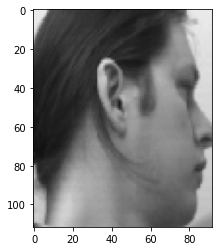

In [17]:
#Now we test if the lists actually work
print(temporary_list_for_class_use_later[0].list_of_vector_array)
plt.imshow(temporary_list_for_class_use_later[0].list_of_vector_array[0], cmap='gray', vmin=0, vmax=255)